In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats as st

In [18]:
df_csv = pd.read_csv("../datasets/chicago_crimes_and_stations_2024_processed.csv")

## Análisis del dataset en gral

In [19]:
# Mostrar las primeras filas (las 5 primeras por defecto)
df_csv.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Crime District,Nearest Police Station District,Nearest Police Station District Name,Distance Crime To Police Station,Season,Day,Day Time
0,1310,CRIMINAL DAMAGE,APARTMENT,False,False,332,5,43,14,1186817.0,1860189.0,41.771470,-87.605748,3,3,Grand Crossing,1367.540845,Winter,Tuesday,Night
1,1365,CRIMINAL TRESPASS,APARTMENT,True,True,223,3,38,26,1179661.0,1873623.0,41.808501,-87.630560,2,2,Wentworth,1380.313916,Winter,Tuesday,Night
2,0498,BATTERY,HOTEL / MOTEL,False,True,834,18,70,04B,1145740.0,1853048.0,41.752749,-87.708864,8,8,Chicago Lawn,3982.098345,Winter,Tuesday,Night
3,1320,CRIMINAL DAMAGE,STREET,False,False,321,20,42,14,1184362.0,1861188.0,41.774269,-87.605748,3,3,Grand Crossing,1005.009383,Winter,Tuesday,Night
4,0460,BATTERY,SIDEWALK,False,False,2531,29,25,08B,1137458.0,1907694.0,41.902858,-87.765574,25,25,Grand Central,1797.243049,Winter,Tuesday,Night


In [20]:
df_csv.describe()

,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Crime District,Distance Crime To Police Station
count,257543.000000,257543.000000,257543.000000,2.575430e+05,2.575430e+05,257543.000000,257543.000000,257543.000000,257543.000000
mean,1157.066812,23.184874,36.182789,1.165281e+06,1.887737e+06,41.847533,-87.668926,11.340821,1998.301436
std,709.355188,13.950006,21.606731,1.616060e+04,3.153809e+04,0.086723,0.051320,7.088240,1213.914195
min,111.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,41.644590,-87.768200,1.000000,12.262025
25%,533.000000,10.000000,22.000000,1.154006e+06,1.860557e+06,41.772692,-87.705488,5.000000,1219.496607
50%,1034.000000,23.000000,32.000000,1.167128e+06,1.894416e+06,41.866091,-87.656973,10.000000,1852.873793
75%,1732.000000,34.000000,53.000000,1.176638e+06,1.910460e+06,41.910074,-87.630560,17.000000,2509.868556
max,2535.000000,50.000000,77.000000,1.205119e+06,1.951493e+06,42.022548,-87.568349,31.000000,14166.024970


In [21]:
df_csv.describe(percentiles=[.1,.9,.95])

,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Crime District,Distance Crime To Police Station
count,257543.000000,257543.000000,257543.000000,2.575430e+05,2.575430e+05,257543.000000,257543.000000,257543.000000,257543.000000
mean,1157.066812,23.184874,36.182789,1.165281e+06,1.887737e+06,41.847533,-87.668926,11.340821,1998.301436
std,709.355188,13.950006,21.606731,1.616060e+04,3.153809e+04,0.086723,0.051320,7.088240,1213.914195
min,111.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,41.644590,-87.768200,1.000000,12.262025
10%,233.000000,5.000000,7.000000,1.143545e+06,1.846880e+06,41.735089,-87.765574,2.000000,738.420241
50%,1034.000000,23.000000,32.000000,1.167128e+06,1.894416e+06,41.866091,-87.656973,10.000000,1852.873793
90%,2222.000000,43.000000,69.000000,1.183960e+06,1.929402e+06,41.961957,-87.605748,22.000000,3348.720845
95%,2511.000000,47.000000,71.000000,1.190862e+06,1.937046e+06,41.983121,-87.604506,25.000000,3900.175870
max,2535.000000,50.000000,77.000000,1.205119e+06,1.951493e+06,42.022548,-87.568349,31.000000,14166.024970


In [22]:
df_csv.describe(include='object')

,IUCR,Primary Type,Location Description,FBI Code,Nearest Police Station District,Nearest Police Station District Name,Season,Day,Day Time
count,257543,257543,256494,257543,257543,257543,257543,257543,257543
unique,340,31,128,26,23,23,4,7,4
top,0486,THEFT,STREET,06,3,Grand Crossing,Summer,Monday,Afternoon
freq,20318,60295,69378,61067,23944,23944,70104,37892,80290


In [23]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257543 entries, 0 to 257542
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   IUCR                                  257543 non-null  object 
 1   Primary Type                          257543 non-null  object 
 2   Location Description                  256494 non-null  object 
 3   Arrest                                257543 non-null  bool   
 4   Domestic                              257543 non-null  bool   
 5   Beat                                  257543 non-null  int64  
 6   Ward                                  257543 non-null  int64  
 7   Community Area                        257543 non-null  int64  
 8   FBI Code                              257543 non-null  object 
 9   X Coordinate                          257543 non-null  float64
 10  Y Coordinate                          257543 non-null  float64
 11  

El dataset chicago_crimes_and_stations_2024_processed contiene 257543 registros de 20 columnas, de las cuales 5 son numéricas y 15 son categóricas.

De las categóricas, observamos que:
- IUCR: es la variable con mayor cardinalidad de todo el dataset
- Location Description: Es la unica variable que presenta valores faltantes
- Arrest y Domestic: Son variables binarias candidatas a ser nuestro target
- Beat, Ward, Community Area y Crime District: Son variables categóricas codificadas como numéricas.

De las númericas observamos que:
- Distance Crime To Police Station: Es la variable con mayor desviación estándar, por lo que podría presentar valores atípicos (outliers)
- Las variables geográficas (Latitude, Longitude, X Coordinate, Y Coordinate) son variables numéricas de gran magnitud, por lo que será necesario escalarlas.

In [24]:
df_csv['Arrest'].value_counts(normalize=True).round(4) * 100

Arrest
False    86.2
True     13.8
Name: proportion, dtype: float64

In [25]:
df_csv['Arrest'].value_counts()

Arrest
False    222011
True      35532
Name: count, dtype: int64

In [26]:
percent = df_csv['Domestic'].value_counts(normalize=True).round(4) * 100
percent.head()

Domestic
False    81.64
True     18.36
Name: proportion, dtype: float64

Las variables Arrest y Domestic se encuentran desbalanceadas en el dataset, con más del 80% de valores 0, por lo que será necesario aplicar técnicas de balanceo como oversampling o undersampling si se desea utilizar alguna de ellas como target.

In [27]:
df_duplicated = df_csv.duplicated()
print("Cantidad de datos duplicados:", df_duplicated.sum())

Cantidad de datos duplicados: 3827


## EDA

### Análisis de las variables numéricas

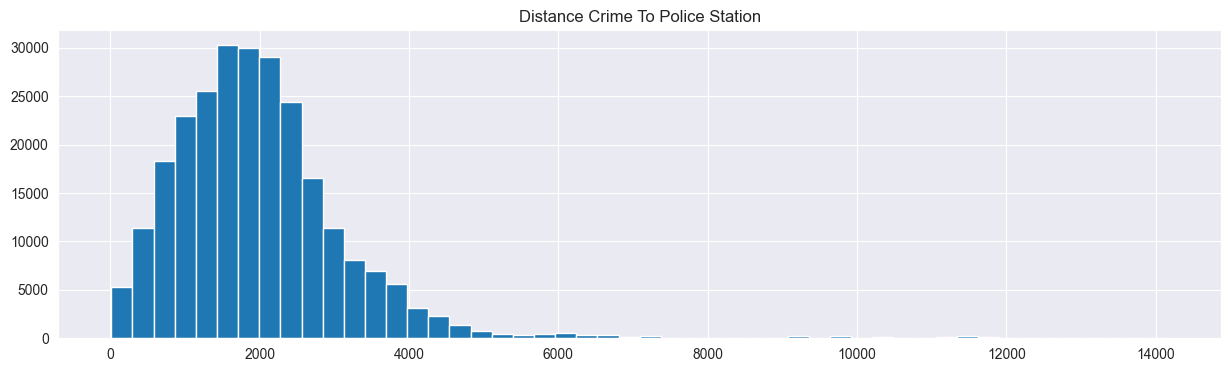

In [69]:
fig, ax = plt.subplots(1, figsize=(15, 4))

ax.hist(df_csv['Distance Crime To Police Station'], bins=50)   # edad
ax.set_title('Distance Crime To Police Station')

plt.show()

#### Medidas de tendencia central: media, mediana y moda

Media

In [33]:
df_csv['Distance Crime To Police Station'].mean()

np.float64(1998.3014360601135)

Mediana

In [35]:
df_csv['Distance Crime To Police Station'].median()

np.float64(1852.873792719668)

Moda

In [36]:
df_csv['Distance Crime To Police Station'].mode()[0]

np.float64(3836.500799270033)

Visualizamos

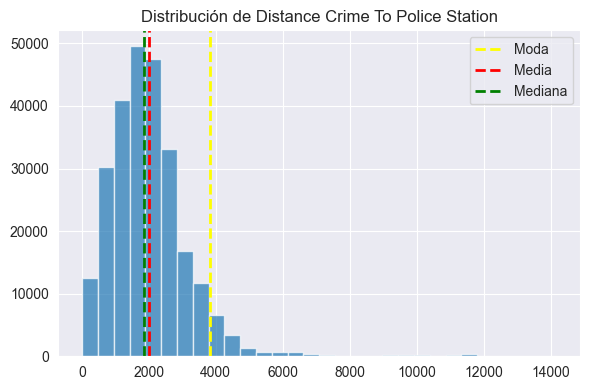

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_csv['Distance Crime To Police Station'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_csv['Distance Crime To Police Station'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_csv['Distance Crime To Police Station'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_csv['Distance Crime To Police Station'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('Distribución de Distance Crime To Police Station')
ax.legend()

plt.tight_layout()
plt.show()

Observamos que la distribución de la distancia entre los delitos y la estación de policía más cercana es asimétrica positiva (sesgada a la derecha).

* La media (≈1998 m) es mayor que la mediana (≈1853 m), lo que indica que hay algunos casos con distancias grandes que elevan el promedio.

* La moda (≈3837 m), en cambio, se encuentra bastante por encima de ambas medidas, lo que explica la cola larga en la parte alta de la distribución.

Vemos en el histograma que la mayor parte de los delitos se concentran dentro de los 2 km de una estación, pero existen outliers significativos (hasta 10–14 km) que amplían el rango.

Los delitos tienden a ocurrir relativamente cerca de las estaciones de policía, aunque la presencia de una cola derecha muestra que algunas zonas alejadas presentan delitos aislados. Esto puede reflejar diferencias geográficas o de cobertura policial dentro de la ciudad (por ejemplo, áreas periféricas con menor densidad de estaciones).

#### Medidas de dispersión: varianza y desviación estándar


In [39]:
# Calculamos la media, varianza y desviación estándar
media = df_csv['Distance Crime To Police Station'].mean()
var = df_csv['Distance Crime To Police Station'].var()
std_dev = df_csv['Distance Crime To Police Station'].std()
print(f'La media de Distance Crime To Police Station es {media:.2f} mm., \nla varianza es {var:.4f} mm. y \nla desviación estándar es {std_dev:.4f} mm.')

La media de Distance Crime To Police Station es 1998.30 mm., 
la varianza es 1473587.6734 mm. y 
la desviación estándar es 1213.9142 mm.


La variable Distance Crime To Police Station presenta una media de 1998,30 m, con una desviación estándar de 1213,91 m y una varianza de 1.473.587,67 m².
Esto indica que, aunque la mayoría de los delitos ocurren cerca de los 2 km de una estación de policía, existe una alta dispersión en los datos: los delitos se distribuyen en un rango muy amplio de distancias.

La alta desviación estándar (≈1,2 km) nos confirma que las distancias varían considerablemente entre diferentes incidentes.

KDE: Kernel Density Estimation para estimar la función de densidad de probabilidad (PDF)


<Axes: xlabel='Distance Crime To Police Station', ylabel='Density'>

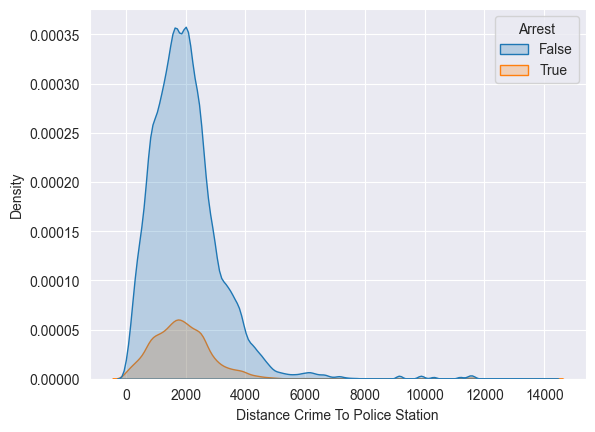

In [41]:
sns.kdeplot(data=df_csv, x='Distance Crime To Police Station', hue='Arrest', fill=True)

Si la análizamos tomando en cuenta el valor de la variable "Arrest" vemos que:

* Ambas distribuciones (arrestos y no arrestos) tienen una forma similar y asimétrica positiva, concentrando la mayoría de los casos entre 0 y 3.000 metros de la estación.

* La curva correspondiente a “Arrest = True” (naranja) tiene una densidad más baja en general, lo que indica que los arrestos son menos frecuentes que los casos sin arresto. Esto lo vimos también analizando el desbalance de esta variable.

* La distribución de los arrestos está ligeramente más concentrada hacia distancias menores: los picos de densidad se dan un poco más cerca de los 1.500–2.000 metros, mientras que los delitos sin arresto presentan un rango algo más amplio. Esto podría sugerir una relación inversa débil entre la distancia y la probabilidad de arresto: A medida que aumenta la distancia entre el lugar del crimen y la estación de policía, la probabilidad de que se produzca un arresto tiende a disminuir.

Aunque la diferencia no es extrema, puede indicar que la proximidad a una estación facilita la respuesta policial (por tiempos de llegada, patrullaje más frecuente o mejor cobertura operativa).

Sin embargo, dado que las distribuciones se superponen ampliamente, la distancia no es el único factor determinante; influyen también otros elementos (tipo de delito, hora del día, recursos policiales disponibles, etc.). La cercanía a una estación parece favorecer los arrestos, pero no es una condición suficiente por sí sola.

#### Medidas de forma: skewness (asimetría) y curtosis

In [44]:
# Con Pandas
print(f"Asímetría de la variable Distance Crime To Police Station: {df_csv['Distance Crime To Police Station'].skew()}")
print(f"Curtosis de la variable Distance Crime To Police Station: {df_csv['Distance Crime To Police Station'].kurtosis()}")

Asímetría de la variable Distance Crime To Police Station: 2.4517430802683116
Curtosis de la variable Distance Crime To Police Station: 13.700733338292508


El valor de Asimetría es positivamente alto, lo que confirma una asimetría a la derecha pronunciada. Es decir, la mayoría de los delitos ocurren a distancias relativamente cortas de una estación de policía, pero existe una cola larga hacia valores mayores (casos aislados muy lejos de una estación).

Una curtosis tan elevada indica una distribución leptocúrtica, es decir, con un pico muy pronunciado y colas más pesadas de lo normal. Esto sugiere que los datos están muy concentrados, como ya vimos, alrededor de la media pero también presentan outliers significativos a grandes distancias.

QQPlot

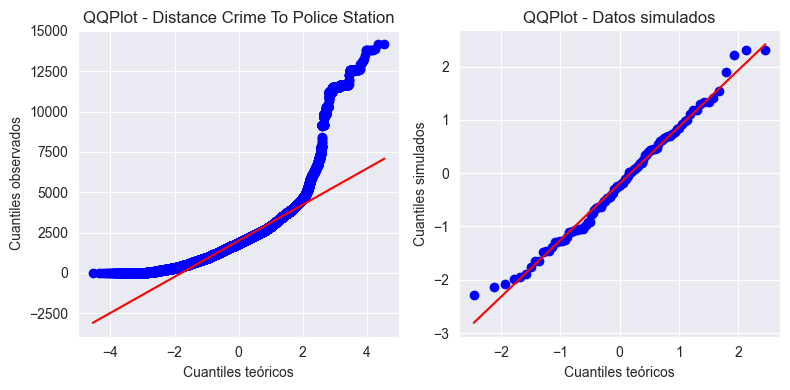

In [46]:
fig, (ax_ping, ax_normal) = plt.subplots(1, 2, figsize=(8, 4))

# QQPlot para Distance Crime To Police Station
st.probplot(df_csv['Distance Crime To Police Station'], dist="norm", plot=ax_ping)
ax_ping.set_title("QQPlot - Distance Crime To Police Station")
ax_ping.set_xlabel("Cuantiles teóricos")
ax_ping.set_ylabel("Cuantiles observados")

# QQPlot para datos aleatorios con distribución normal
data = np.random.normal(loc=0, scale=1, size=100)
st.probplot(data, dist="norm", plot=ax_normal)
ax_normal.set_title("QQPlot - Datos simulados")
ax_normal.set_xlabel("Cuantiles teóricos")
ax_normal.set_ylabel("Cuantiles simulados")

plt.tight_layout()
plt.show()

En el QQPlot izquierdo (Distance Crime To Police Station), vemos que los puntos se desvían fuertemente de la línea roja (que representa una distribución normal teórica):

* En la parte central, los puntos siguen parcialmente la línea, pero las colas se curvan hacia arriba y hacia abajo de manera pronunciada. Esta forma en “S” es indicador de una asimetría positiva fuerte, con una cola derecha larga (valores extremos altos), algo que ya confirmamos previamente. Además, los puntos de las colas están muy alejados de la línea, lo que evidencia la presencia de outliers significativos.

En el QQPlot derecho contiene datos simulados normales, y podemos ver como los puntos se alinean casi perfectamente sobre la línea roja.

Tanto esta comparación visual, como los datos estadísticos anteriores, dejan en claro que la variable Distance Crime To Police Station no sigue una distribución normal y sugiere que para realizar análisis estadísticos o modelado con esta variable sería recomendable aplicar transformaciones (como logarítmica o Box–Cox) para reducir la asimetría o utilizar métodos no paramétricos, más robustos ante distribuciones no normales.

### Análisis de las variables categóricas

Convertimos columnas del dataset al tipo correcto

In [77]:
df_csv['IUCR'] = df_csv['IUCR'].astype('category')
df_csv['FBI Code'] = df_csv['FBI Code'].astype('category')
df_csv['Primary Type'] = df_csv['Primary Type'].astype('category')
df_csv['Location Description'] = df_csv['Location Description'].astype('category')
df_csv['Arrest'] = df_csv['Arrest'].astype('category')
df_csv['Domestic'] = df_csv['Domestic'].astype('category')
df_csv['Nearest Police Station District Name'] = df_csv['Nearest Police Station District Name'].astype('category')
df_csv['Nearest Police Station District'] = df_csv['Nearest Police Station District'].astype('category')
df_csv['Season'] = df_csv['Season'].astype('category')
df_csv['Day'] = df_csv['Day'].astype('category')
df_csv['Day Time'] = df_csv['Day Time'].astype('category')
df_csv['Beat'] = df_csv['Beat'].astype('category')
df_csv['Ward'] = df_csv['Ward'].astype('category')
df_csv['Community Area'] = df_csv['Community Area'].astype('category')
df_csv['Crime District'] = df_csv['Crime District'].astype('category')

In [78]:
df_csv.describe(include='category')

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,Crime District,Nearest Police Station District,Nearest Police Station District Name,Season,Day,Day Time
count,257543,257543,256494,257543,257543,257543,257543,257543,257543,257543,257543,257543,257543,257543,257543
unique,340,31,128,2,2,275,50,77,26,23,23,23,4,7,4
top,0486,THEFT,STREET,False,False,1834,27,25,06,8,3,Grand Crossing,Summer,Monday,Afternoon
freq,20318,60295,69378,222011,210247,3083,11963,12884,61067,17169,23944,23944,70104,37892,80290


In [79]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257543 entries, 0 to 257542
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   IUCR                                  257543 non-null  category
 1   Primary Type                          257543 non-null  category
 2   Location Description                  256494 non-null  category
 3   Arrest                                257543 non-null  category
 4   Domestic                              257543 non-null  category
 5   Beat                                  257543 non-null  category
 6   Ward                                  257543 non-null  category
 7   Community Area                        257543 non-null  category
 8   FBI Code                              257543 non-null  category
 9   X Coordinate                          257543 non-null  float64 
 10  Y Coordinate                          257543 non-null  f

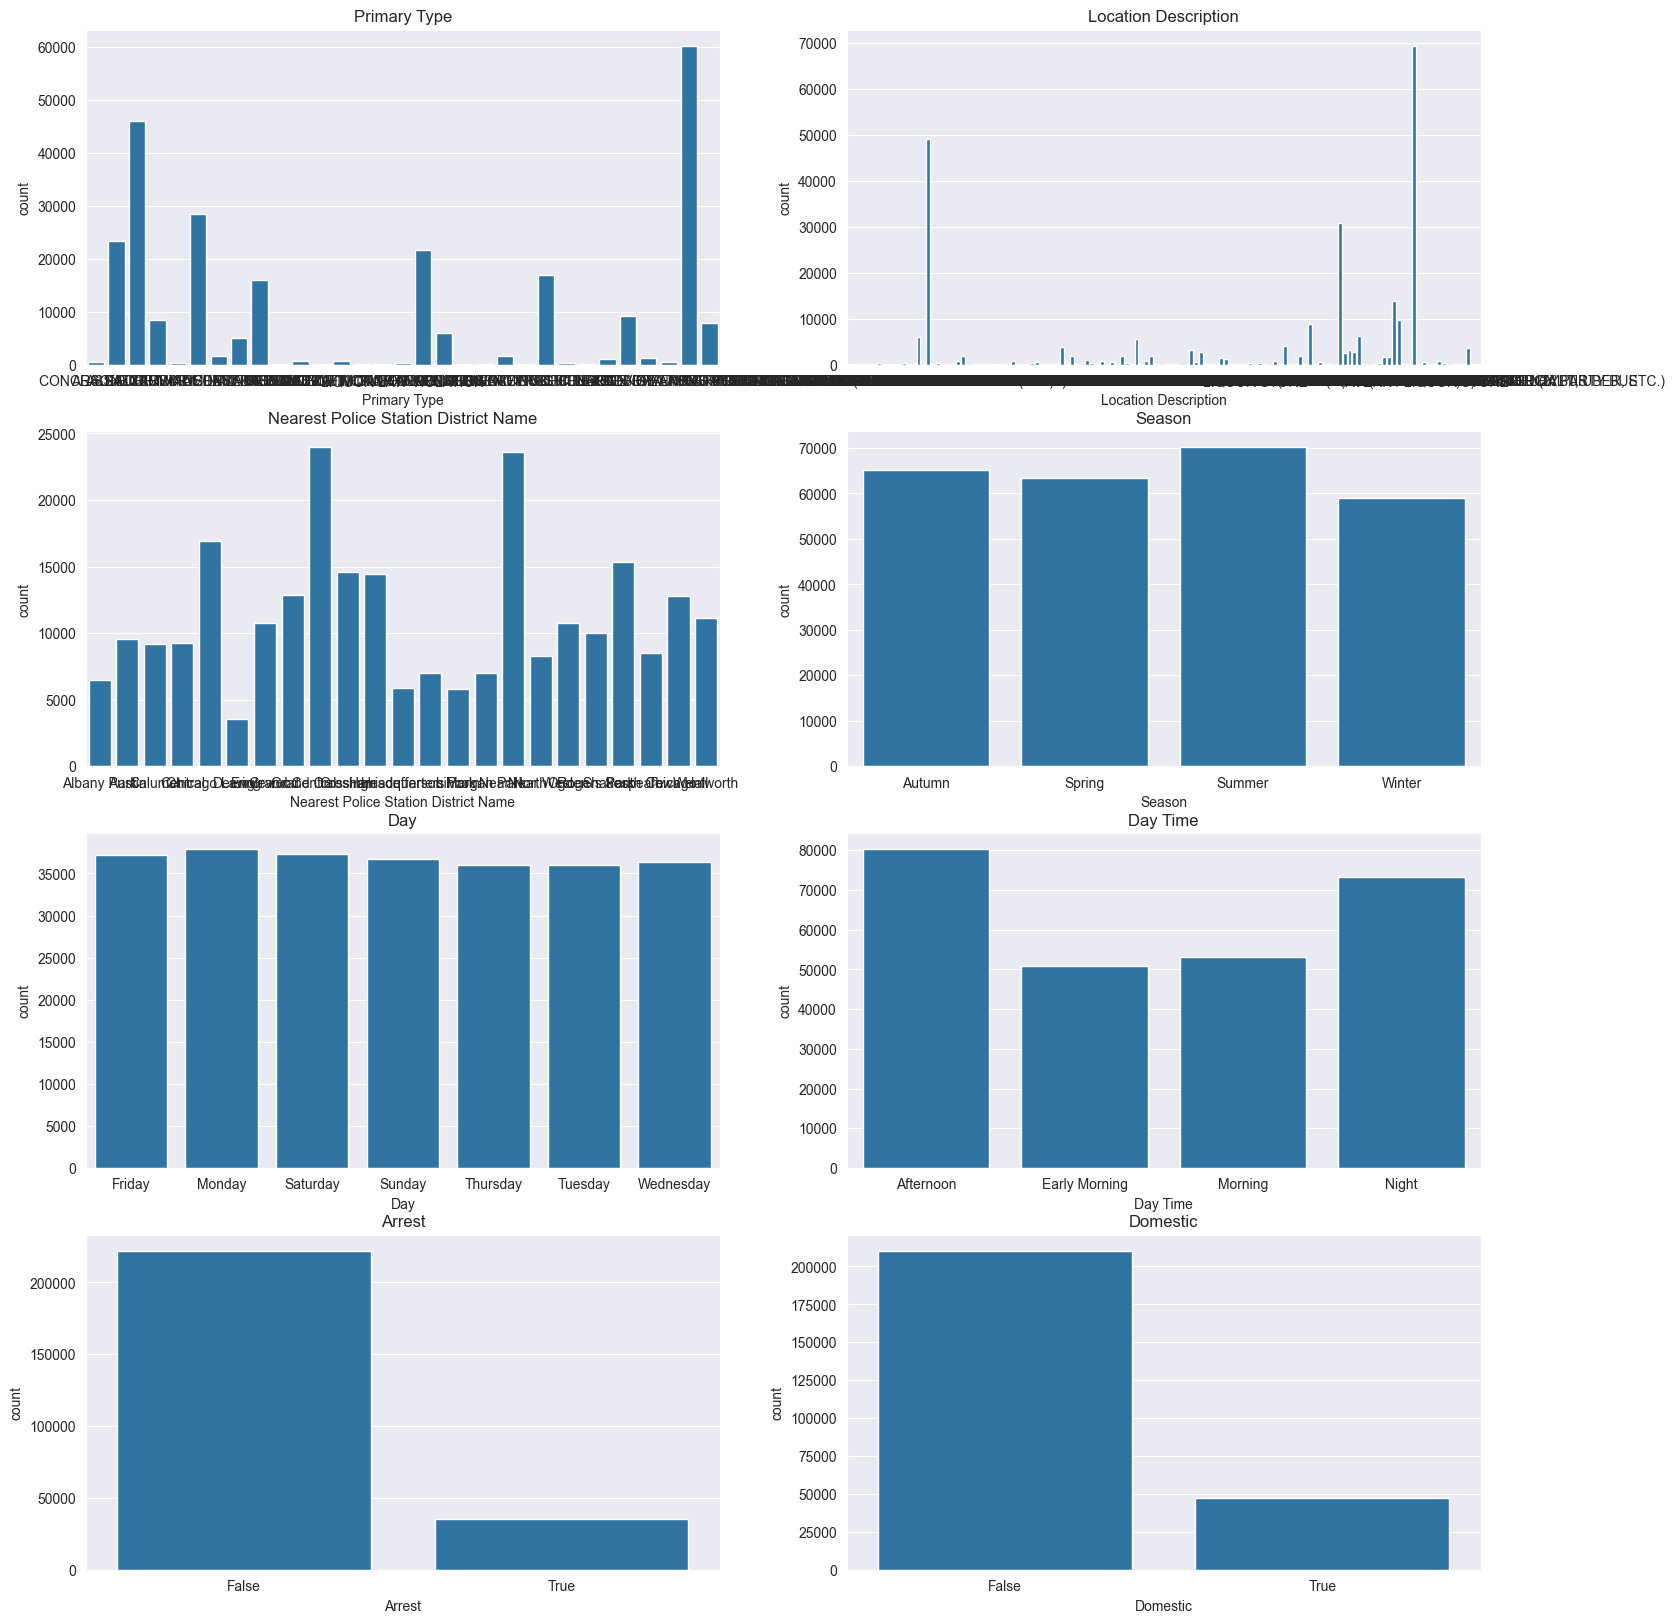

In [81]:
# Crear cada cajita
fig, ax = plt.subplots(4, 2, figsize=(18, 20))

# Gráficos de barras de cada una
sns.countplot(x='Primary Type', data=df_csv, ax=ax[0,0])
sns.countplot(x='Location Description', data=df_csv, ax=ax[0,1])
sns.countplot(x='Nearest Police Station District Name', data=df_csv, ax=ax[1,0])
sns.countplot(x='Season', data=df_csv, ax=ax[1,1])
sns.countplot(x='Day', data=df_csv, ax=ax[2,0])
sns.countplot(x='Day Time', data=df_csv, ax=ax[2,1])
sns.countplot(x='Arrest', data=df_csv, ax=ax[3,0])
sns.countplot(x='Domestic', data=df_csv, ax=ax[3,1])

# Títulos
ax[0,0].set_title('Primary Type')
ax[0,1].set_title('Location Description')
ax[1,0].set_title('Nearest Police Station District Name')
ax[1,1].set_title('Season')
ax[2,0].set_title('Day')
ax[2,1].set_title('Day Time')
ax[3,0].set_title('Arrest')
ax[3,1].set_title('Domestic')

plt.show()

Algunas observaciones:

* Los tipos de delitos más comunes son claramente algunos pocos (por ejemplo, THEFT y BATTERY), con una caída marcada en frecuencia para el resto.
* En cuanto a los lugares de ocurrencia, predominan unas pocas categorías (como STREET o RESIDENCE), lo que sugiere que los crímenes se concentran en espacios públicos y residenciales.

Esto podría indicar que el patrón de criminalidad se concentra en unos pocos tipos de delito y en lugares específicos, lo que permitiría focalizar políticas preventivas.

* Las diferencias entre estaciones son leves, pero otoño y primavera concentran ligeramente más delitos que invierno. Una posible interpretación es que la mayor actividad al aire libre o movilidad durante las estaciones templadas puede aumentar la exposición y las oportunidades de delito.

* El mayor número de delitos ocurre en la tarde, seguido por la noche. Esto es consistente con patrones de movilidad urbana: mayor circulación de personas y actividades durante la tarde/noche.

* Los delitos están uniformemente distribuidos entre los días, sin picos significativos. Sugiere que la criminalidad en Chicago tiene un comportamiento estable diario, sin concentrarse en fines de semana o días laborales.

* La gran mayoría de los registros corresponde a delitos sin arresto. Esto puede deberse a la dificultad de detención inmediata, delitos sin testigos o de bajo perfil investigativo.

* Los casos no domésticos superan ampliamente a los domésticos como ya vimos. Sin embargo, los delitos domésticos representan un porcentaje relevante dentro de la categoría total y suelen requerir estrategias específicas de intervención y protección.

#### Visualizamos relaciones entre variables

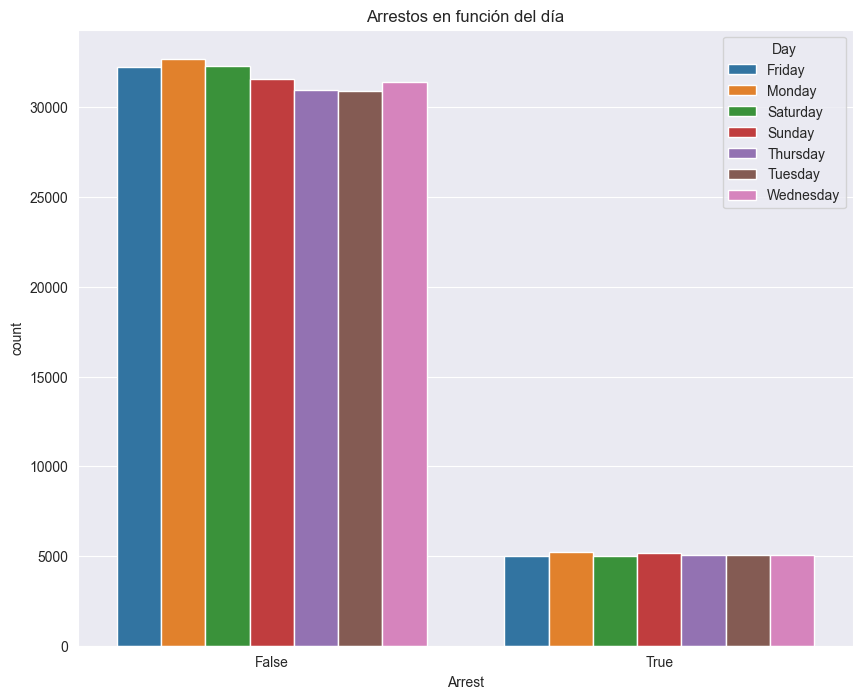

In [51]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Arrest', hue='Day', data=df_csv)
plt.title("Arrestos en función del día")
plt.show()

La diferencia entre días es mínima, lo que indica qué la probabilidad de arresto es similar sin importar el día.

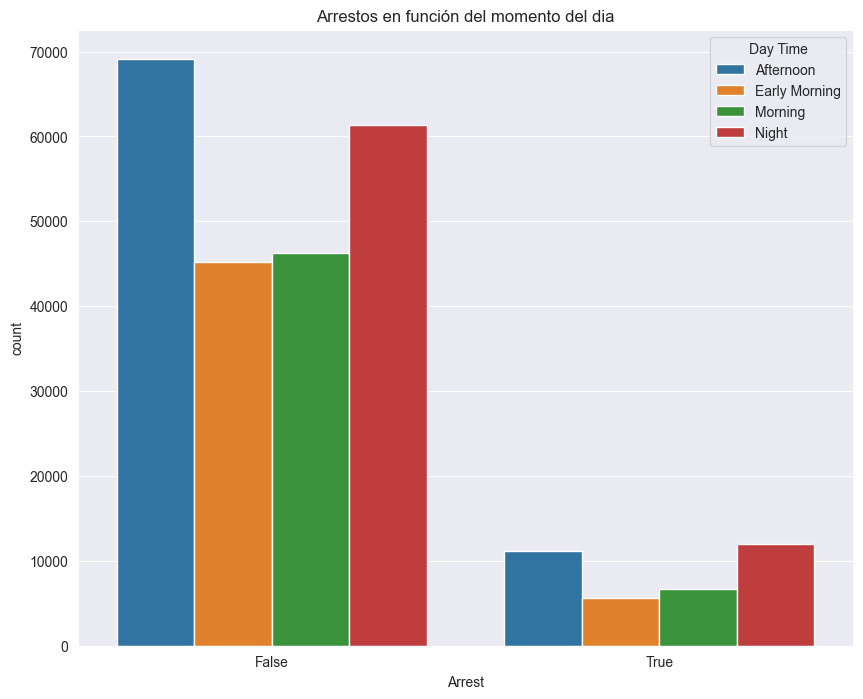

In [52]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Arrest', hue='Day Time', data=df_csv)
plt.title("Arrestos en función del momento del dia")
plt.show()

* Los arrestos se concentran más en la tarde y noche, con menos ocurrencias en la madrugada. Esto coincide con los períodos de mayor actividad policial y mayor cantidad de delitos reportados, lo que podría reflejar mayor capacidad de respuesta en esas franjas horarias.

#### Pairplot

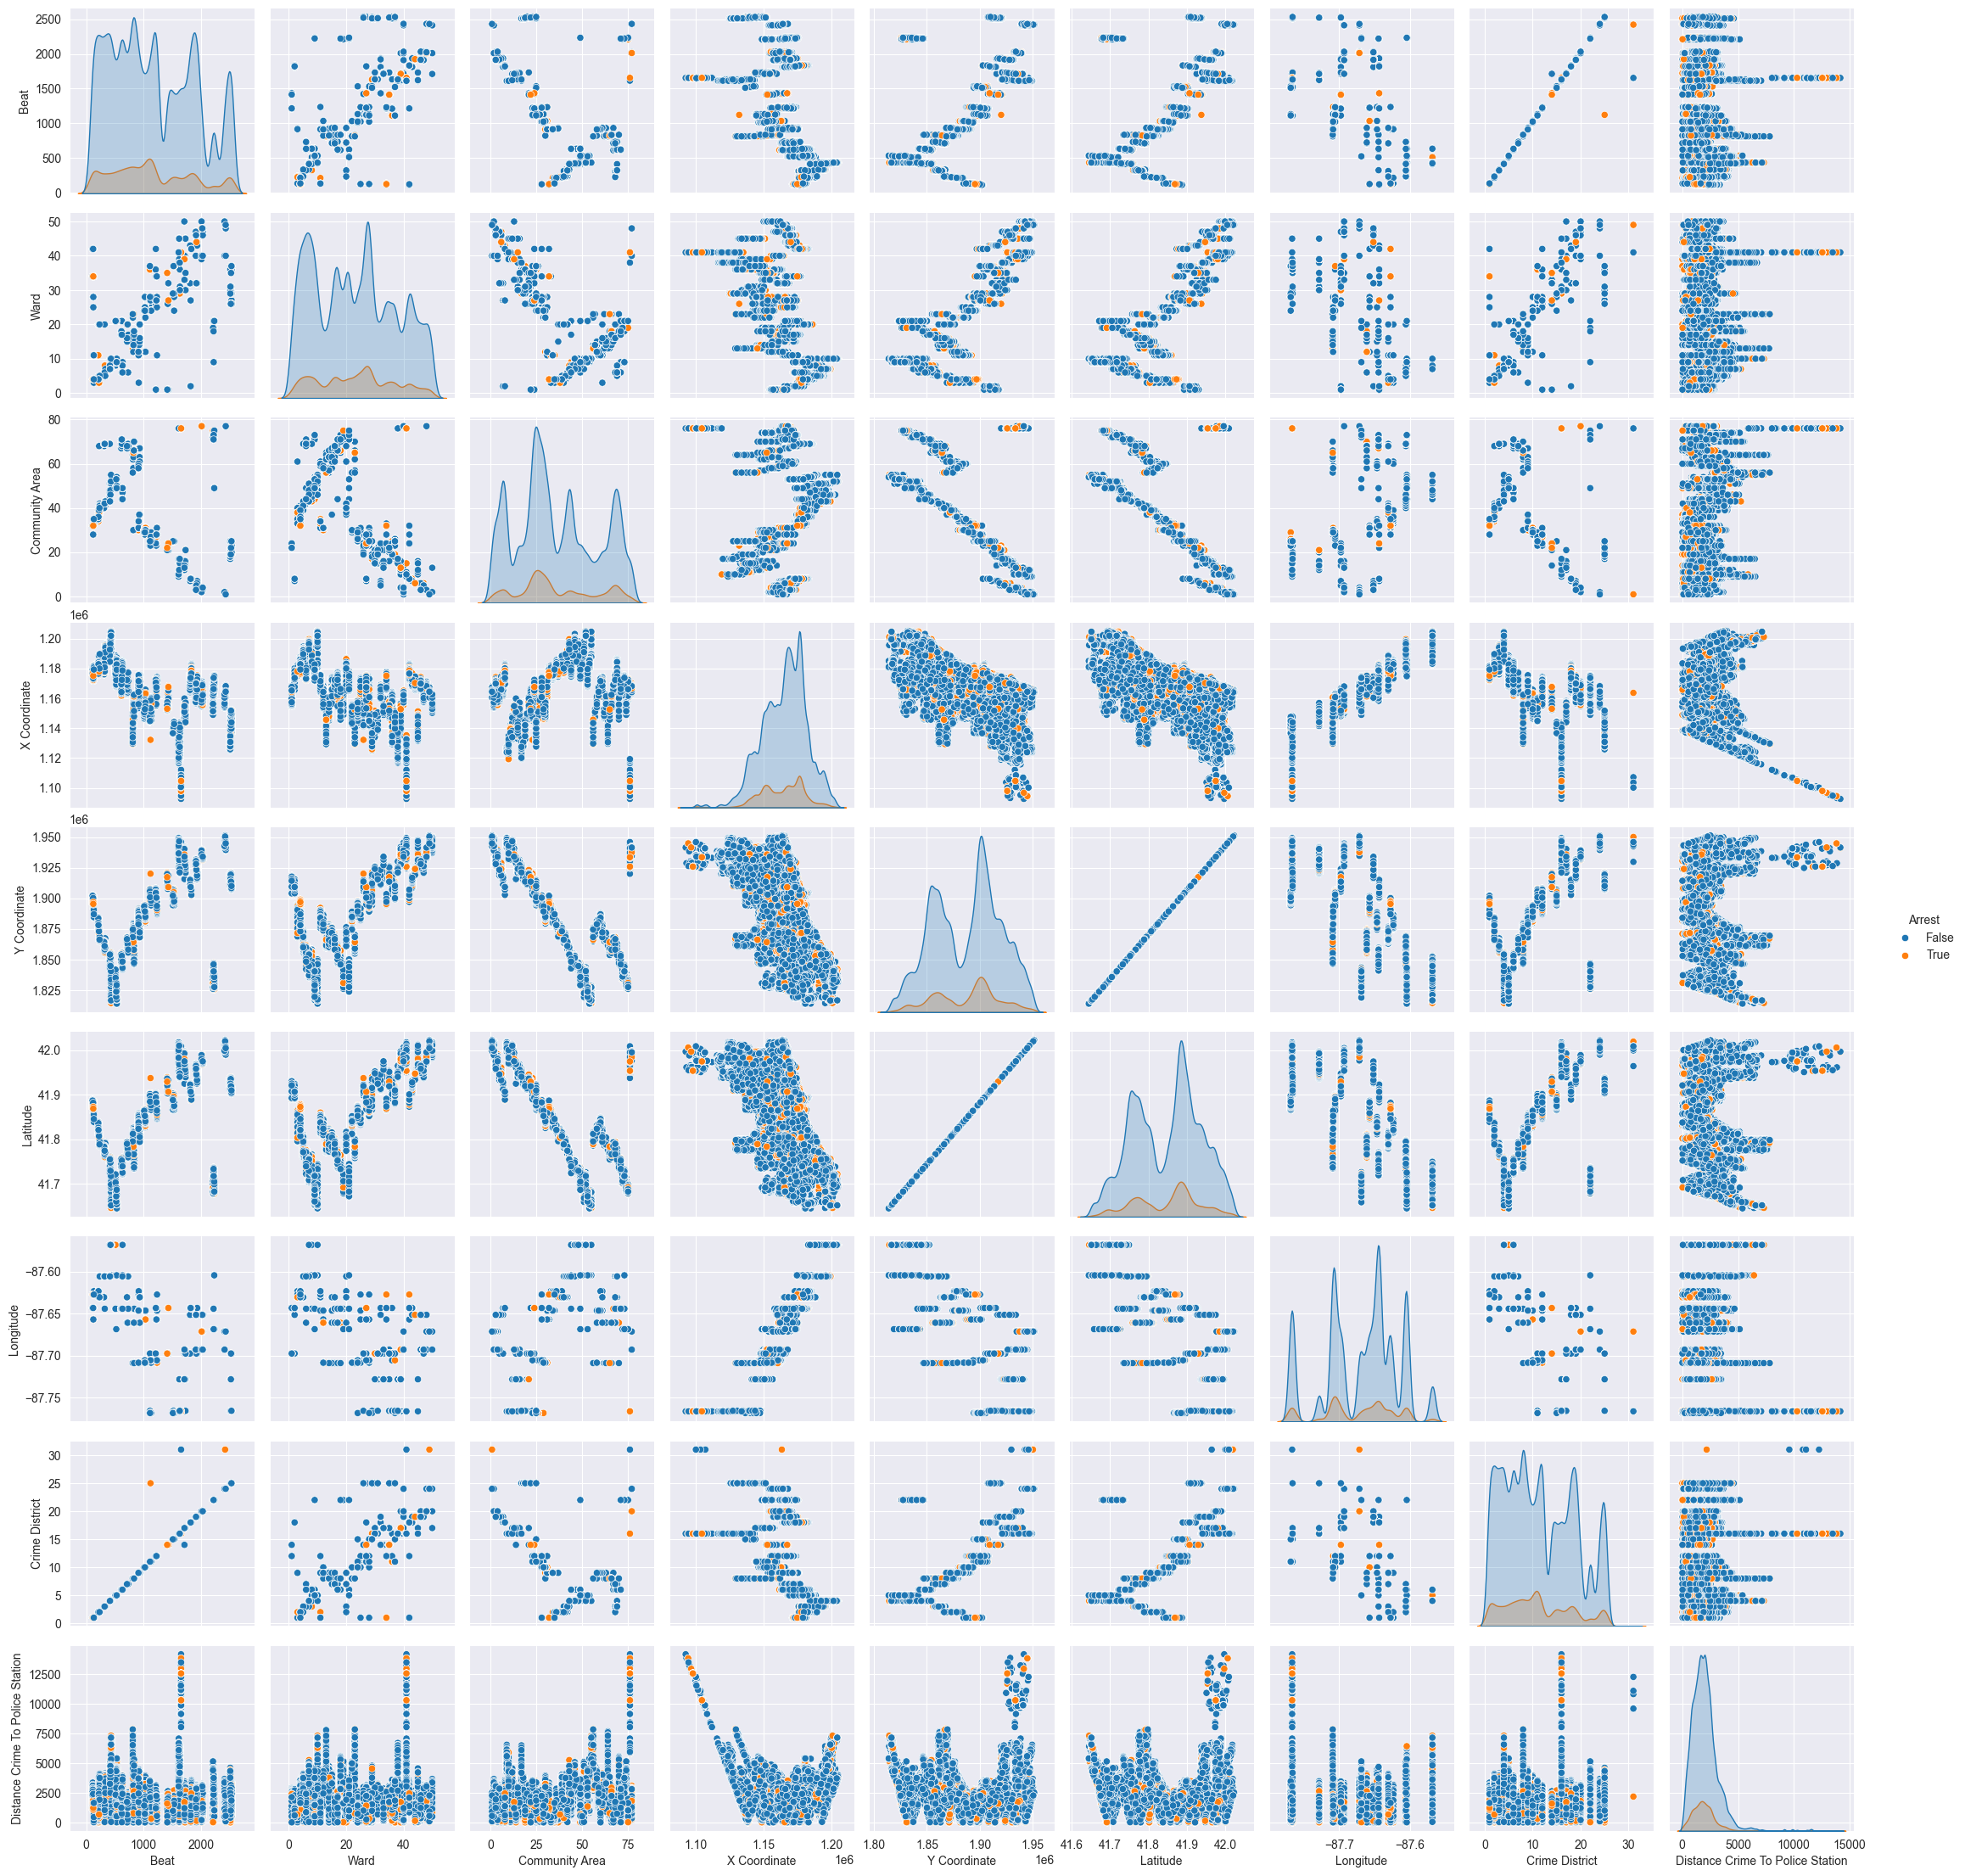

In [54]:
sns.pairplot(data=df_csv, hue='Arrest')
plt.show()

* En la diagonal, las curvas de densidad muestran que la mayoría de las variables tienen distribuciones asimétricas o multimodales.

* En particular, la variable Distance Crime To Police Station vuelve a mostrar una asimetría positiva, confirmando el patrón ya visto en los histogramas y QQPlots.

* Las variables espaciales (Latitude, Longitude, X Coordinate, Y Coordinate) presentan distribuciones bimodales o concentradas en rangos específicos, lo que refleja la segmentación geográfica de los crímenes dentro de la ciudad. Las relaciones entre Latitude y Longitude forman una nube bien delimitada con forma diagonal, lo cual es esperable ya que corresponden a coordenadas geográficas de Chicago. Esto sugiere que los delitos se concentran dentro de los límites urbanos, sin puntos dispersos fuera de la ciudad (no hay ruido geográfico significativo). El color que distingue Arrest = True/False muestra que no hay una separación clara por ubicación, es decir, los arrestos ocurren en proporciones similares en todas las zonas, sin un patrón espacial evidente.

* Dado que el dataset es del año 2024, la variable Year tiene una sola categoría (sin variación real).

* Se aprecia una ligera tendencia: a medida que cambia la latitud o longitud, la distancia promedio a la estación más cercana también varía. Sin embargo, no se observa una correlación lineal fuerte; la relación parece no lineal y dispersa.

* En casi todos los gráficos, los puntos naranjas (Arrest = True) están mezclados homogéneamente con los azules (False), sin fronteras claras entre ambos grupos. Esto podría sugerir que la ocurrencia de un arresto no depende de manera directa de las variables numéricas analizadas (distancia, coordenadas, fecha o comunidad), sino de otros factores cualitativos (tipo de delito, etc.).

## Análisis de nulos y outliers

### Nulos

In [55]:
print(f"Valores faltantes: {df_csv.isnull().sum()}") # Calcular valores faltantes

Valores faltantes: IUCR                                       0
Primary Type                               0
Location Description                    1049
Arrest                                     0
Domestic                                   0
Beat                                       0
Ward                                       0
Community Area                             0
FBI Code                                   0
X Coordinate                               0
Y Coordinate                               0
Latitude                                   0
Longitude                                  0
Crime District                             0
Nearest Police Station District            0
Nearest Police Station District Name       0
Distance Crime To Police Station           0
Season                                     0
Day                                        0
Day Time                                   0
dtype: int64


In [56]:
df_csv.isna()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Crime District,Nearest Police Station District,Nearest Police Station District Name,Distance Crime To Police Station,Season,Day,Day Time
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257538,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
257539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
257540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
257541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df_csv.isna().mean().round(4)*100

IUCR                                    0.00
Primary Type                            0.00
Location Description                    0.41
Arrest                                  0.00
Domestic                                0.00
Beat                                    0.00
Ward                                    0.00
Community Area                          0.00
FBI Code                                0.00
X Coordinate                            0.00
Y Coordinate                            0.00
Latitude                                0.00
Longitude                               0.00
Crime District                          0.00
Nearest Police Station District         0.00
Nearest Police Station District Name    0.00
Distance Crime To Police Station        0.00
Season                                  0.00
Day                                     0.00
Day Time                                0.00
dtype: float64

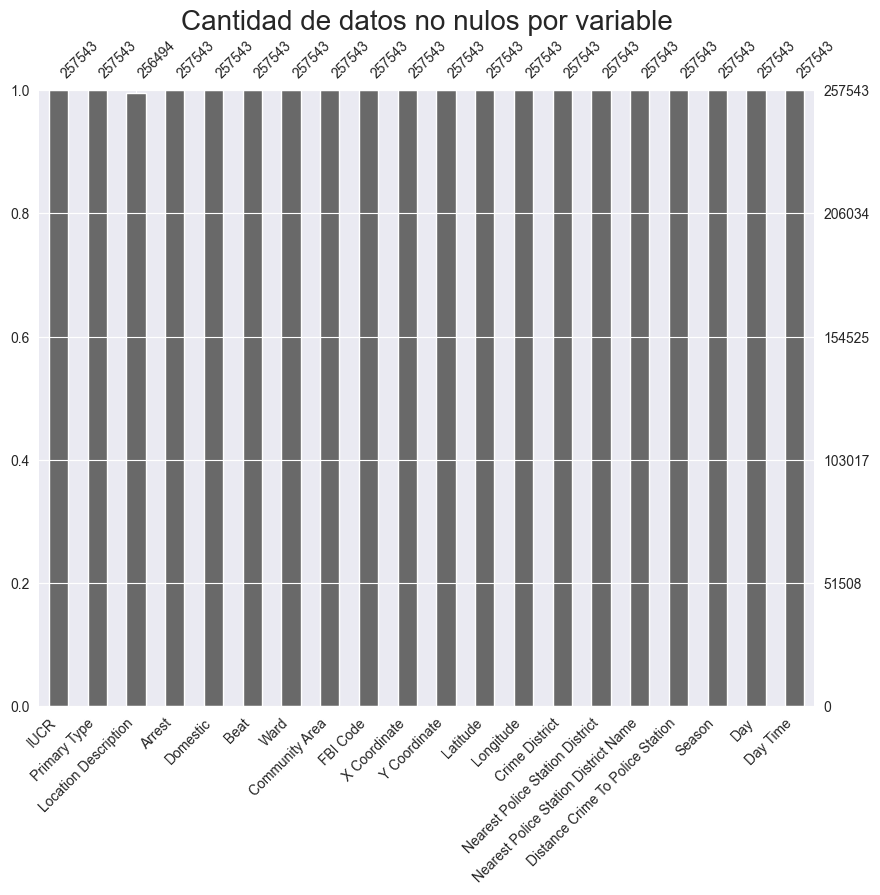

In [58]:
msno.bar(df_csv, fontsize=10, figsize=(10,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

<Axes: >

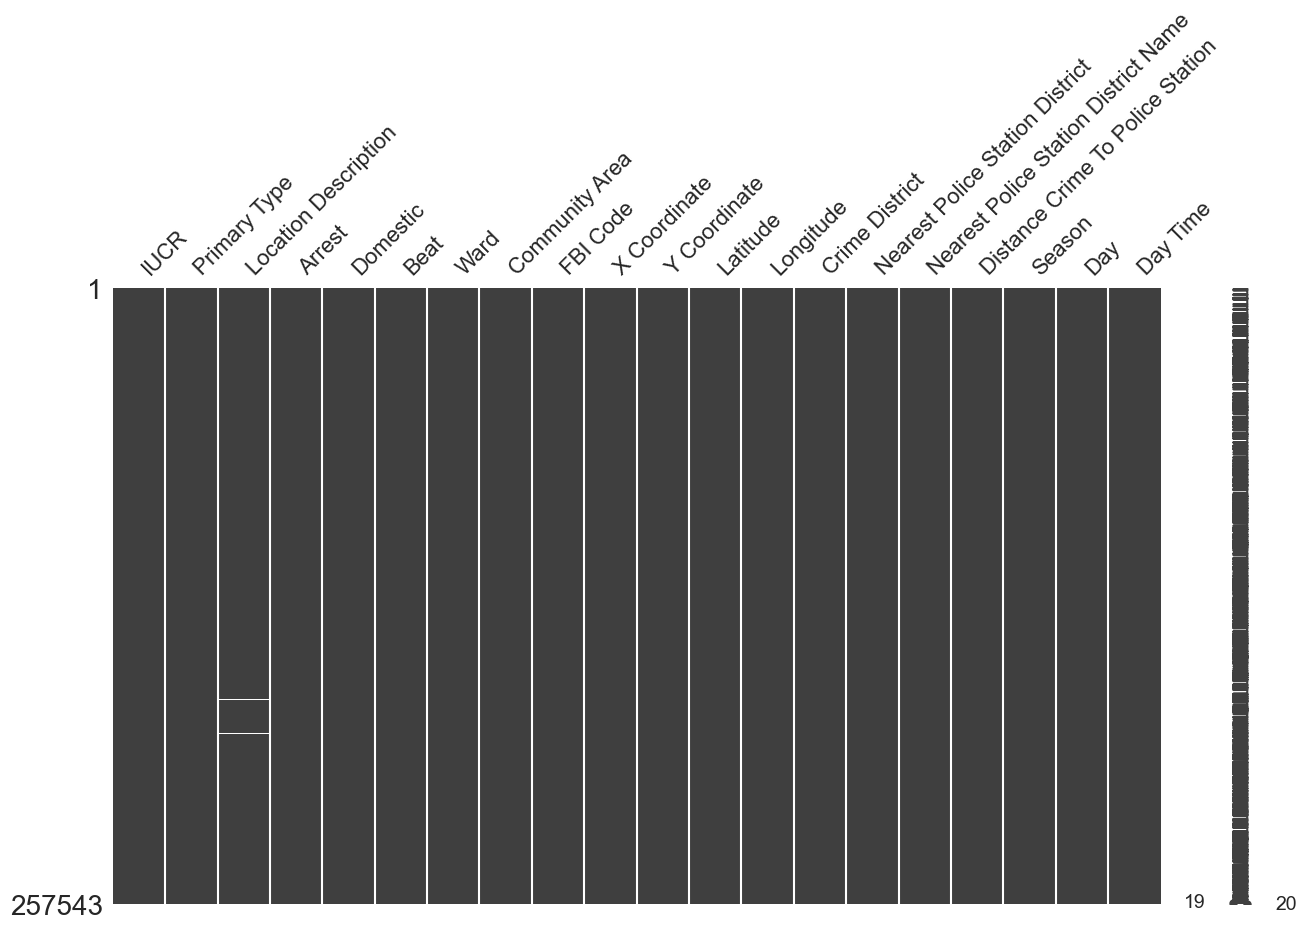

In [59]:
# Matriz de valores faltantes
msno.matrix(df_csv, figsize=(15,8))

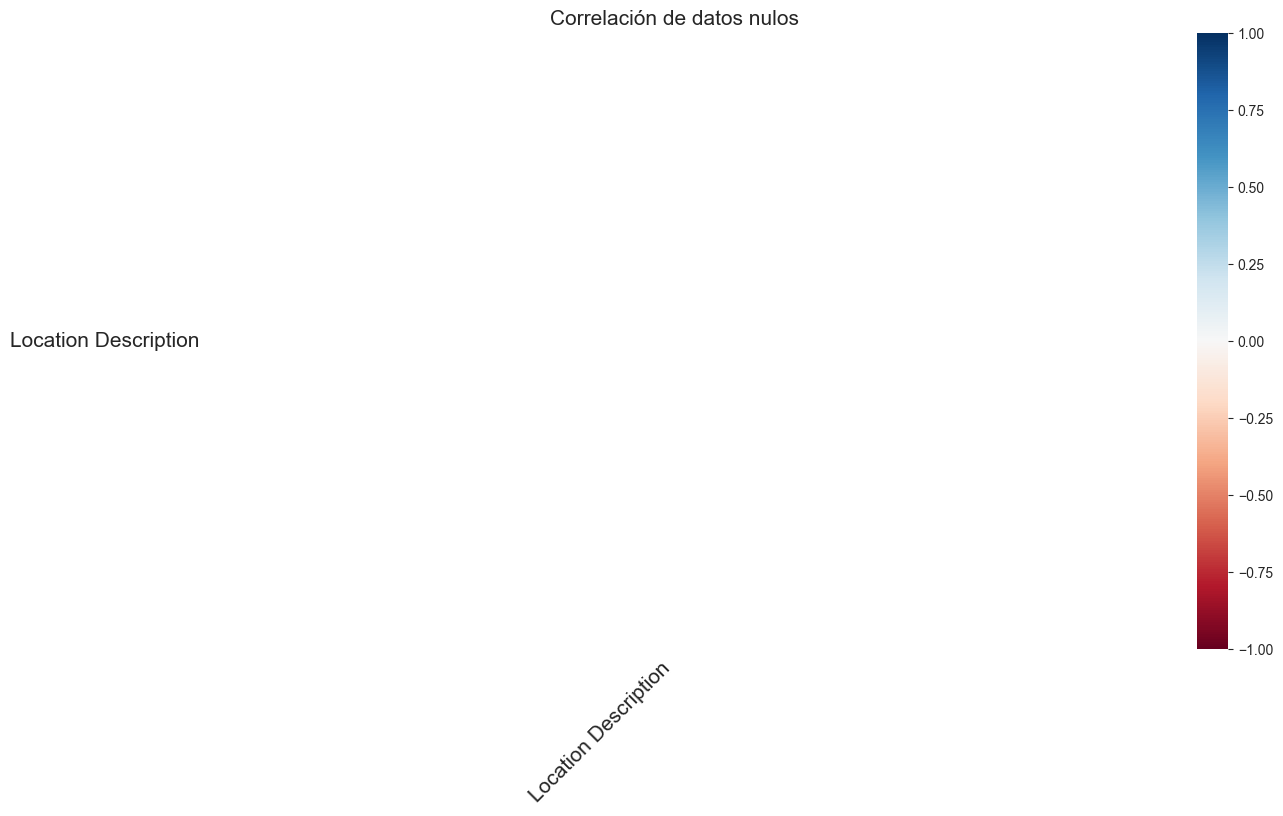

In [60]:
msno.heatmap(df_csv, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

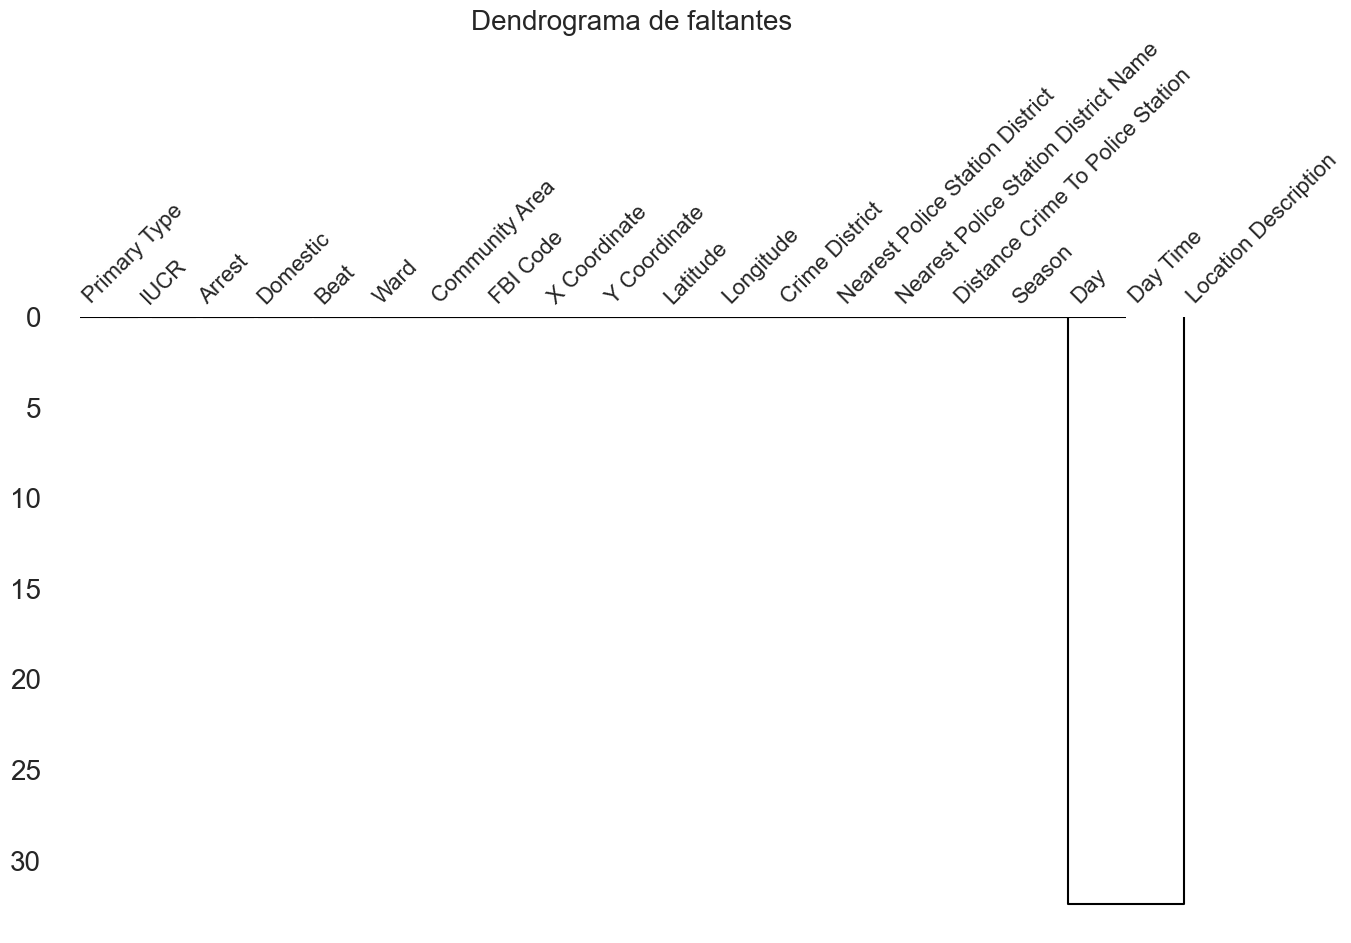

In [61]:
msno.dendrogram(df_csv, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

Vemos que la variable "Location Description" es la unica que presenta valores faltantes, 1049 casos para ser exactos.

### Outliers

In [62]:
df_for_outliers = df_csv[['Distance Crime To Police Station']]
df_for_outliers

,Distance Crime To Police Station
0,1367.540845
1,1380.313916
2,3982.098345
3,1005.009383
4,1797.243049
...,...
257538,3752.041388
257539,4187.217568
257540,2240.852504
257541,2819.936986


#### Basado en el rango intercuartil

Un dato se considera outlier si es < (Q1 - 1.5 * IQR)) o > (Q3 + 1.5 * IQR)

In [63]:
Q1 = df_for_outliers.quantile(0.25)
Q3 = df_for_outliers.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (df_for_outliers < (Q1 - 1.5 * IQR)) | (df_for_outliers > (Q3 + 1.5 * IQR))
print(f"Outliers\nDistance Crime To Police Station: <{Q1['Distance Crime To Police Station'] - 1.5 * IQR['Distance Crime To Police Station']:.02f} o >{Q3['Distance Crime To Police Station'] + 1.5 * IQR['Distance Crime To Police Station']:.02f}")

Outliers
Distance Crime To Police Station: <-716.06 o >4445.43


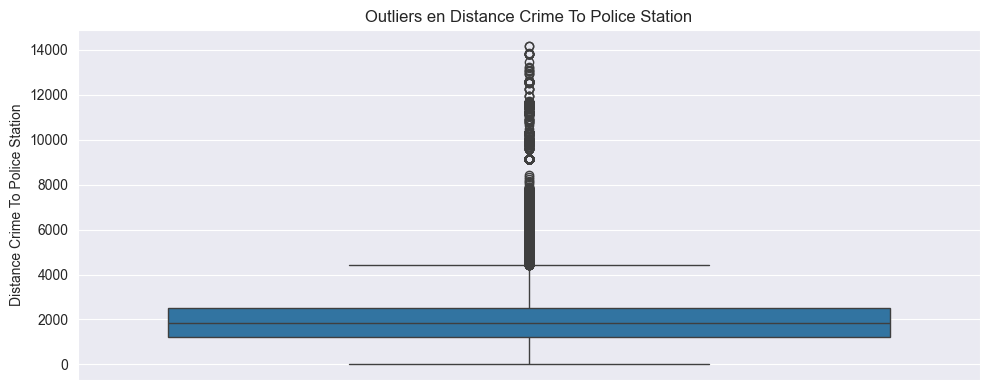

In [64]:
# Visualización de outliers con boxplots
fig, axes = plt.subplots(1, figsize=(10, 4))

# Boxplot para 'age'
sns.boxplot(y=df_for_outliers['Distance Crime To Police Station'], ax=axes)
axes.set_title('Outliers en Distance Crime To Police Station')

plt.tight_layout()
plt.show()

#### Basado en la desviación estándar (distribución normal)

Un dato se considera outlier si es < (mean - 3 * std) o > (mean + 3 * std)

In [65]:
# Método basado en desviación estándar
mean = df_for_outliers.mean()
#std = df.std()
std = df_for_outliers.apply(lambda x: np.nanstd(x, ddof=1))

outliers_std = (df_for_outliers < (mean - 3 * std)) | (df_for_outliers > (mean + 3 * std))

print(f"Outliers\nDistance Crime To Police Station: <{mean['Distance Crime To Police Station'] - 3 * std['Distance Crime To Police Station']:.02f} o >{mean['Distance Crime To Police Station'] + 3 * std['Distance Crime To Police Station']:.02f}")

Outliers
Distance Crime To Police Station: <-1643.44 o >5640.04


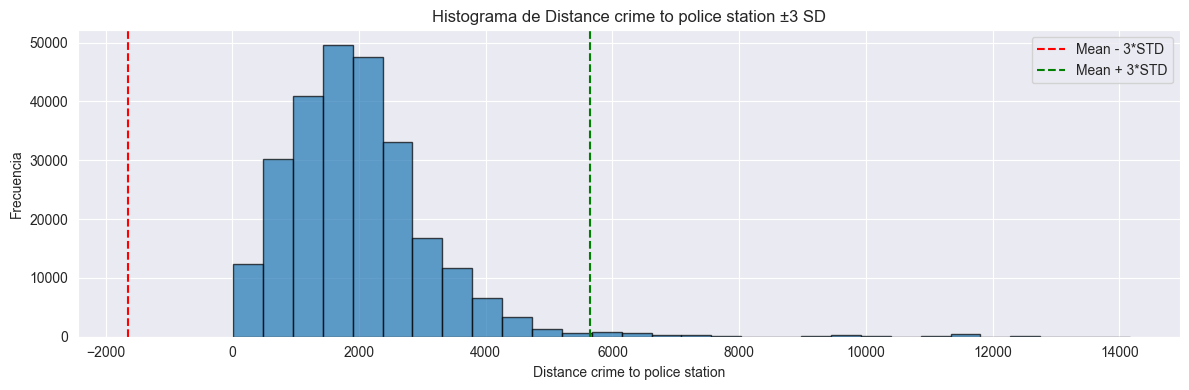

In [66]:
def plot_hist_with_std(ax, data, varname, mean, std):
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(mean[varname] - 3*std[varname], color='red', linestyle='--', label='Mean - 3*STD')
    ax.axvline(mean[varname] + 3*std[varname], color='green', linestyle='--', label='Mean + 3*STD')
    ax.set_xlabel(varname.capitalize())
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma de {varname.capitalize()} ±3 SD')
    ax.legend()

fig, ax = plt.subplots(1, figsize=(12, 4))

plot_hist_with_std(ax, df_for_outliers['Distance Crime To Police Station'], 'Distance Crime To Police Station', mean, std)

plt.tight_layout()
plt.show()

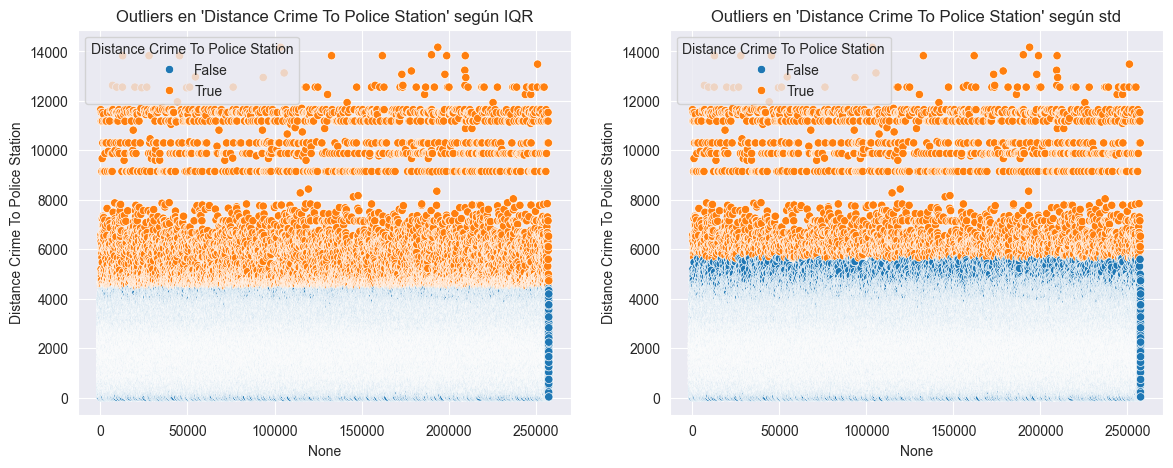

In [67]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=df_for_outliers.index, y=df_for_outliers['Distance Crime To Police Station'], hue=outliers_iqr['Distance Crime To Police Station'], ax=ax[0])
ax[0].set_title("Outliers en 'Distance Crime To Police Station' según IQR")
sns.scatterplot(x=df_for_outliers.index, y=df_for_outliers['Distance Crime To Police Station'], hue=outliers_std['Distance Crime To Police Station'], ax=ax[1])
ax[1].set_title("Outliers en 'Distance Crime To Police Station' según std")
plt.show()

In [68]:
df_csv[outliers_std['Distance Crime To Police Station']==True]["Arrest"].value_counts()

Arrest
False    2972
True      445
Name: count, dtype: int64

Tanto con la regla de IQR y con el método del desvío estándar podemos confirmar nuestras sospechas de que la variable Distance Crime To Police Station presenta outliers. Estos valores deberán ser tratados/eliminados o se debera utilizar un modelo de ML que sea robusto ante valores atípicos.